In [1]:
from PIL import Image, ImageEnhance, ImageFilter

def imshow(img):
    if isinstance(img, Image.Image):
        display(img)
    else:
        display(Image.fromarray(img))


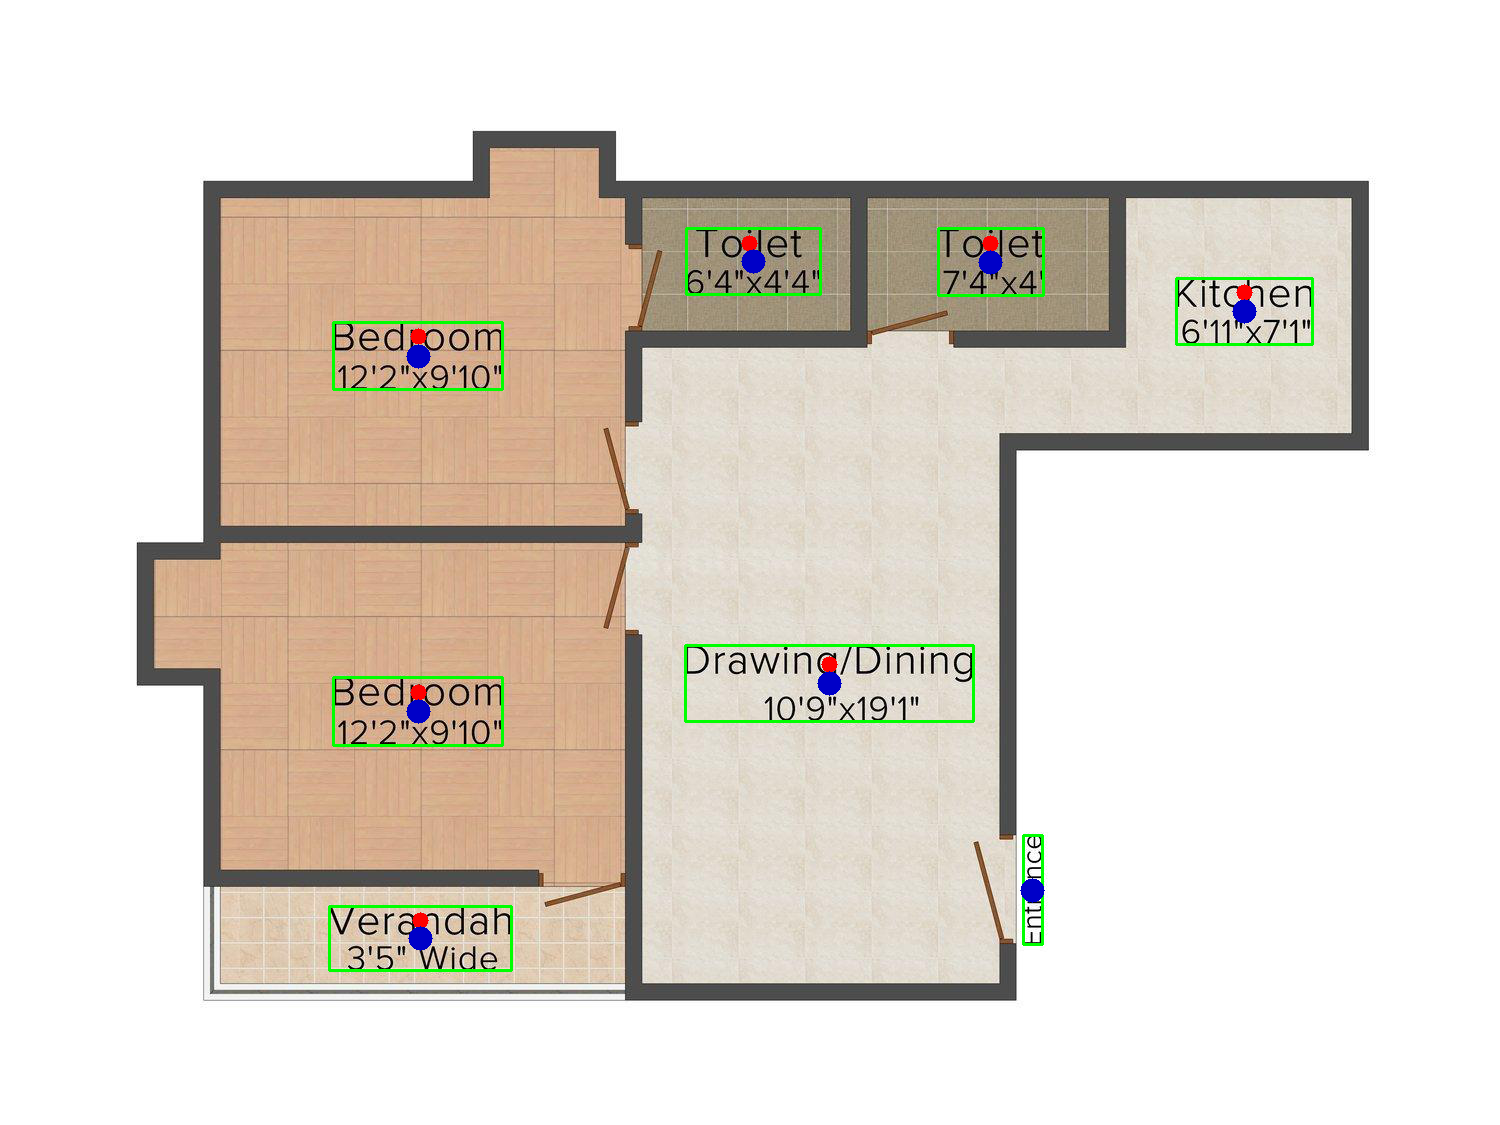

In [73]:
import pytesseract
from PIL import Image, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage
import numpy as np
from pytesseract import Output
import math
import re

# 0034158_0000000.jpeg
# 0014482_0000000.jpg
im = Image.open('0034158_0000000.jpeg')
rim = np.asarray(im)

# preprocessing
im = im.point(lambda x: 0 if x < 90 else 255)   # threshold (binarize)
im = np.asarray(im)

x = im[:, :, 0] | im[:, :, 1] | im[:, :, 2]
im = Image.fromarray(x)


# display(im)

data = pytesseract.image_to_data(im, config='--psm 12', output_type=Output.DICT) 

n_boxes = len(data['level'])

im = np.asarray(im)

labels = {}
others = {}


for i in range(n_boxes):
    (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
    
    text = data['text'][i].lower()

    if len(text) < 3: 
        continue
    
    polygon = np.array([x, y, w, h])
    if text.lower() in ['wide', 'room', 'area', 'master'] or len(re.sub("[^0-9]", "", text)) > 1:
        if text not in others:
            others[text] = {}
        c = len(others[text])
        others[text][c] = polygon
        continue
        
        
    # cv2.rectangle(im, (x, y), (x + w, y + h), (0, 255, 0), 2)
    center = (round(x + w/2), round(y + h/2))
    
    if text not in labels:
        labels[text] = {}

    no_rooms = len(labels[text])
    labels[text][no_rooms] = polygon

    cv2.circle(rim, center, radius=8, color=(255, 0, 0), thickness=-1)


# assigning noise
for other_label in others:
    for i in others[other_label]:
        poly = others[other_label][i]
        
        nearest_room = None
        nearest_dist = 10**90
        
        (x, y, w, h) = poly
        center = np.array((round(x+w/2), round(y+h/2)))

        for room_label in labels:
            for j in labels[room_label]:
                polyroom = labels[room_label][j]
                (xx, yy, ww, hh) = polyroom
                center_room = np.array((round(xx+ww/2), round(yy+hh/2)))
                dist = np.linalg.norm(center_room - center)
                if dist < nearest_dist:
                    nearest_dist = dist
                    nearest_room = (room_label, j)

        r, idx = nearest_room
        (xr, yr, wr, hr) = labels[r][idx]
        
        x_min= min(xr, x)
        x_max= max(xr + wr, x + w)
        y_min= min(yr, y)
        y_max= max(yr + hr, y + h)
        
        labels[r][idx] = (x_min, y_min, x_max - x_min, y_max - y_min)

# drawing rect
for room_label in labels:
    for i in labels[room_label]:
        poly = labels[room_label][i]
        (x, y, w, h) = poly
        cv2.rectangle(rim, (x, y), (x + w, y + h), (0, 255, 0), 2)
        center = (round(x + w/2), round(y + h/2))
        cv2.circle(rim, center, radius=12, color=(0, 0, 200), thickness=-1)
        
display(Image.fromarray(rim))


In [ ]:
import cv2
import numpy as np

image = cv2.imread('0034158_0000000.jpeg')
cv2.imshow("",image)
# Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray, 30, 200)

# Finding Contours
# Use a copy of the image e.g. edged.copy()
# since findContours alters the image
contours, hierarchy = cv2.findContours(edged.copy(),
    cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

cv2.imshow("1",edged)

print("Number of Contours found = " + str(len(contours)))

# Draw all contours
# -1 signifies drawing all contours
img2=cv2.drawContours(image, contours, -1, (0,255,0), 2)
print(len(contours))
print(img2.shape)
cv2.imshow("2",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of Contours found = 668
668
(1125, 1500, 3)


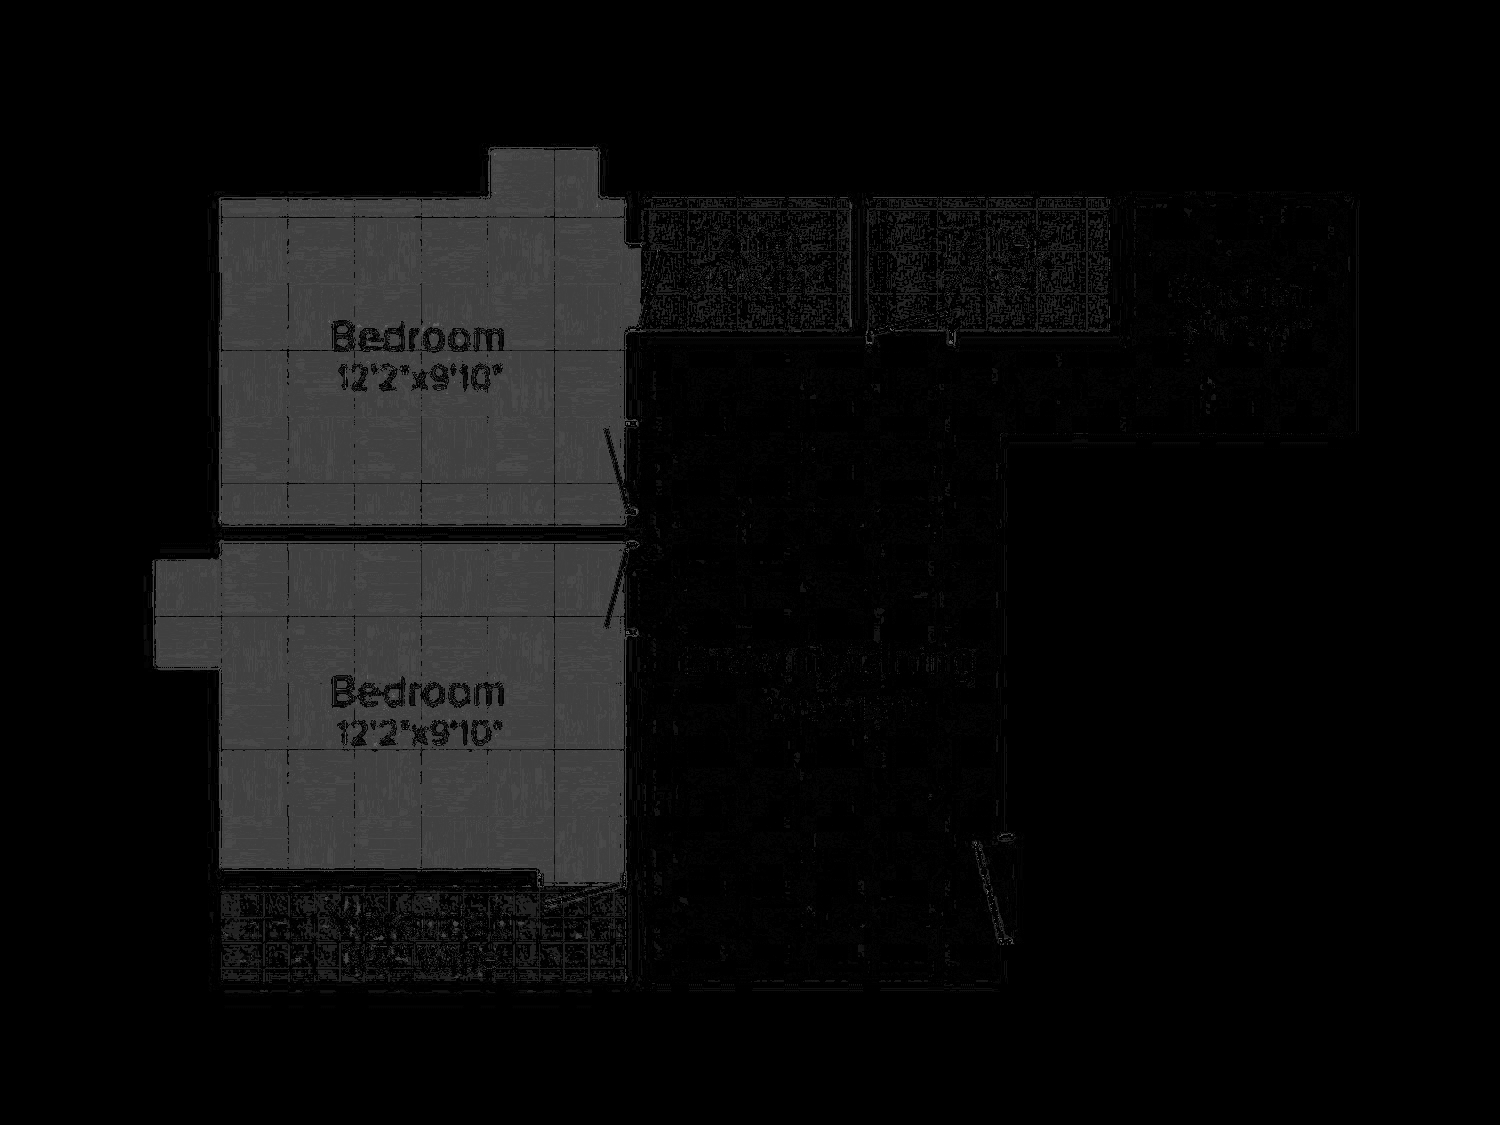

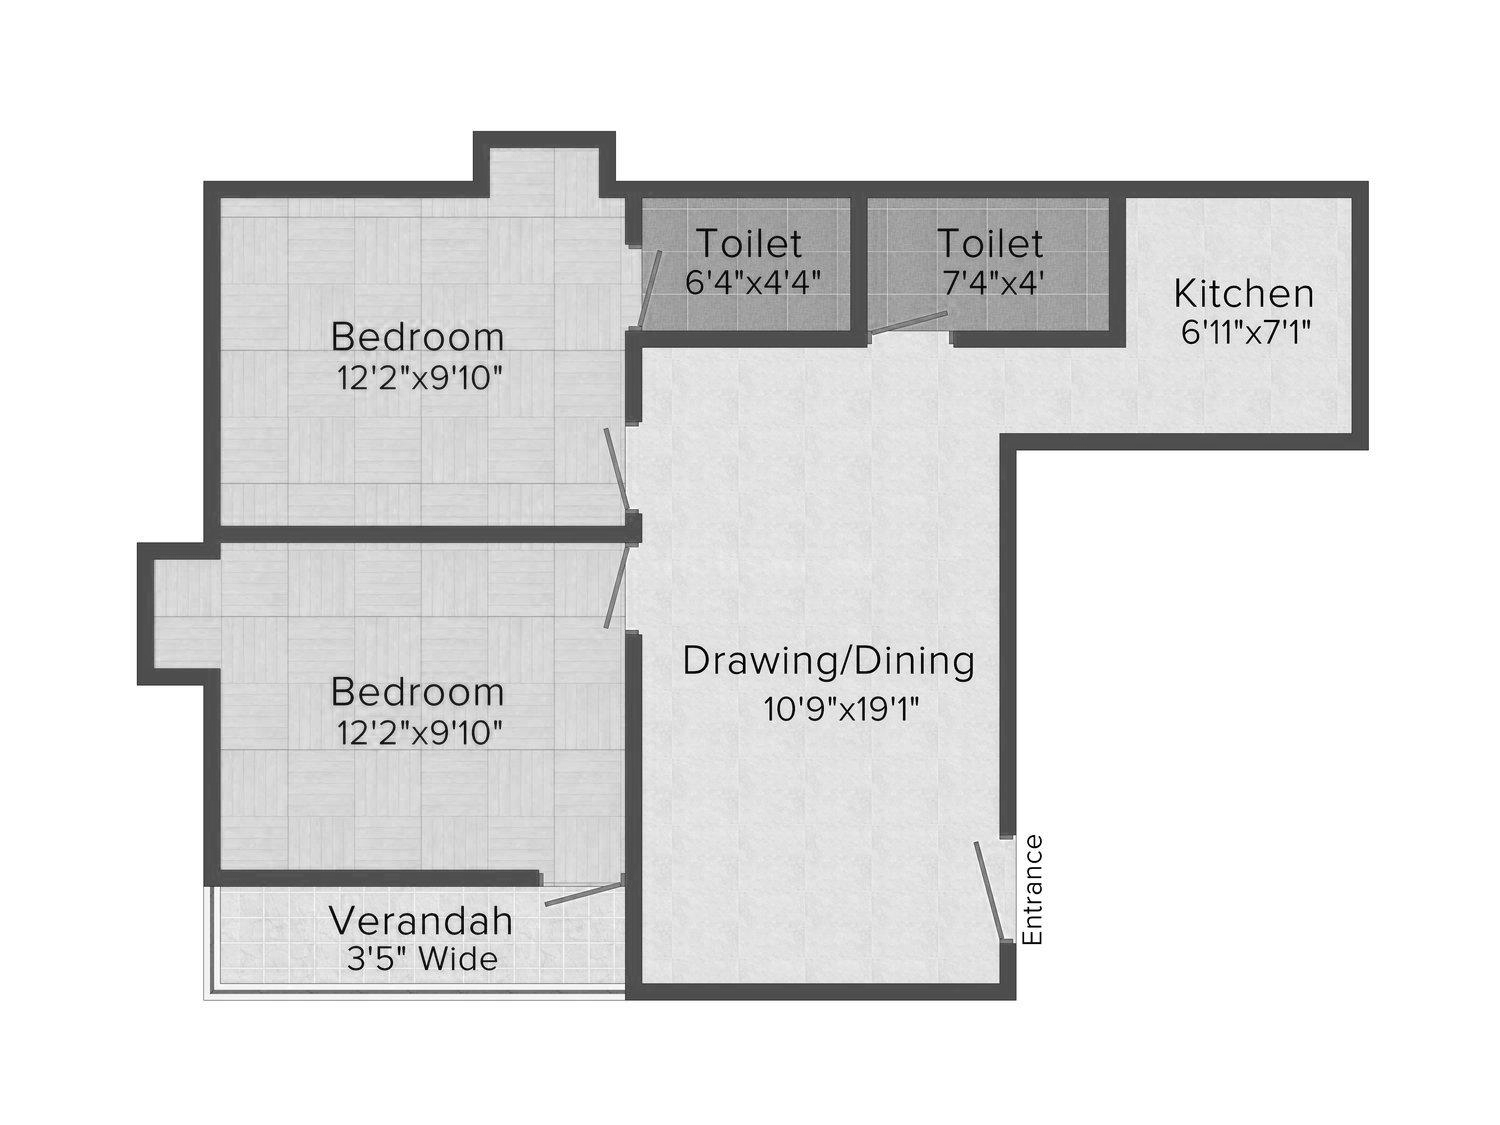

In [84]:
import cv2 

img = cv2.imread('0034158_0000000.jpeg')
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
h,s,v = cv2.split(hsv)

th, threshed = cv2.threshold(v, 0, 400, cv2.THRESH_BINARY_INV)
dst1 = cv2.bitwise_and(img, img, mask=threshed)


display(Image.fromarray(h&v&s))
display(Image.fromarray(v))


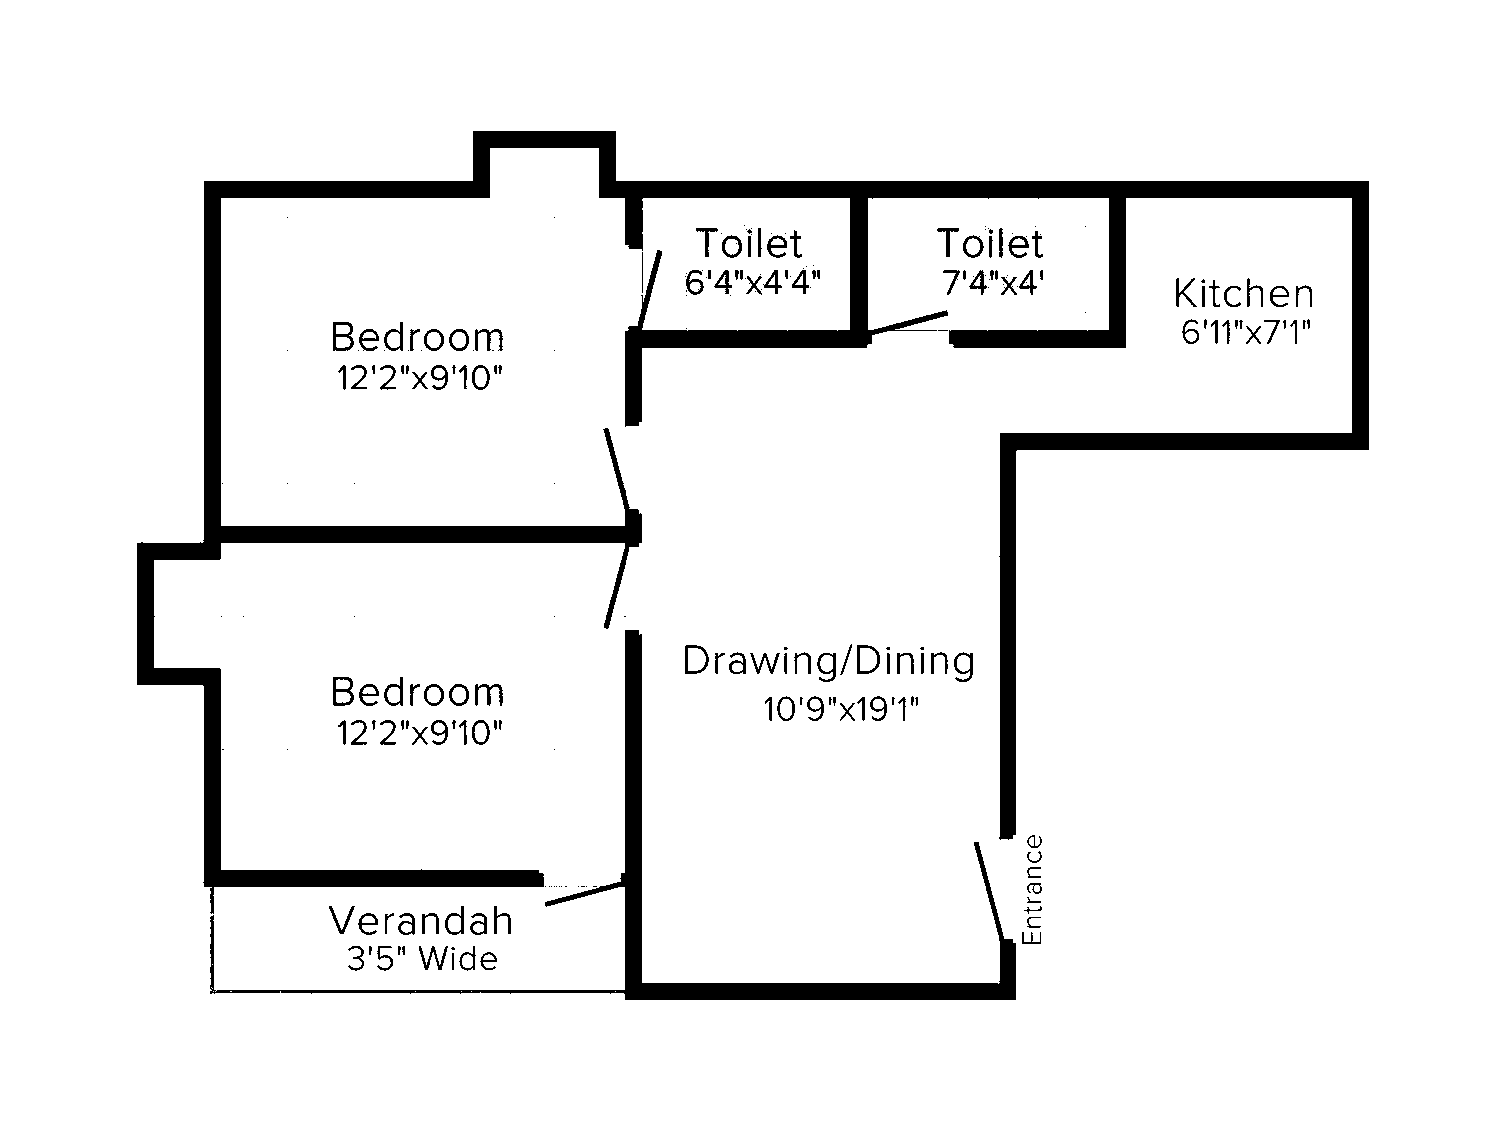

In [77]:
import cv2 
import numpy as np

img = cv2.imread('0034158_0000000.jpeg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(hsv)
mask = g > 120
text_mask = g < 50
imshow(mask)



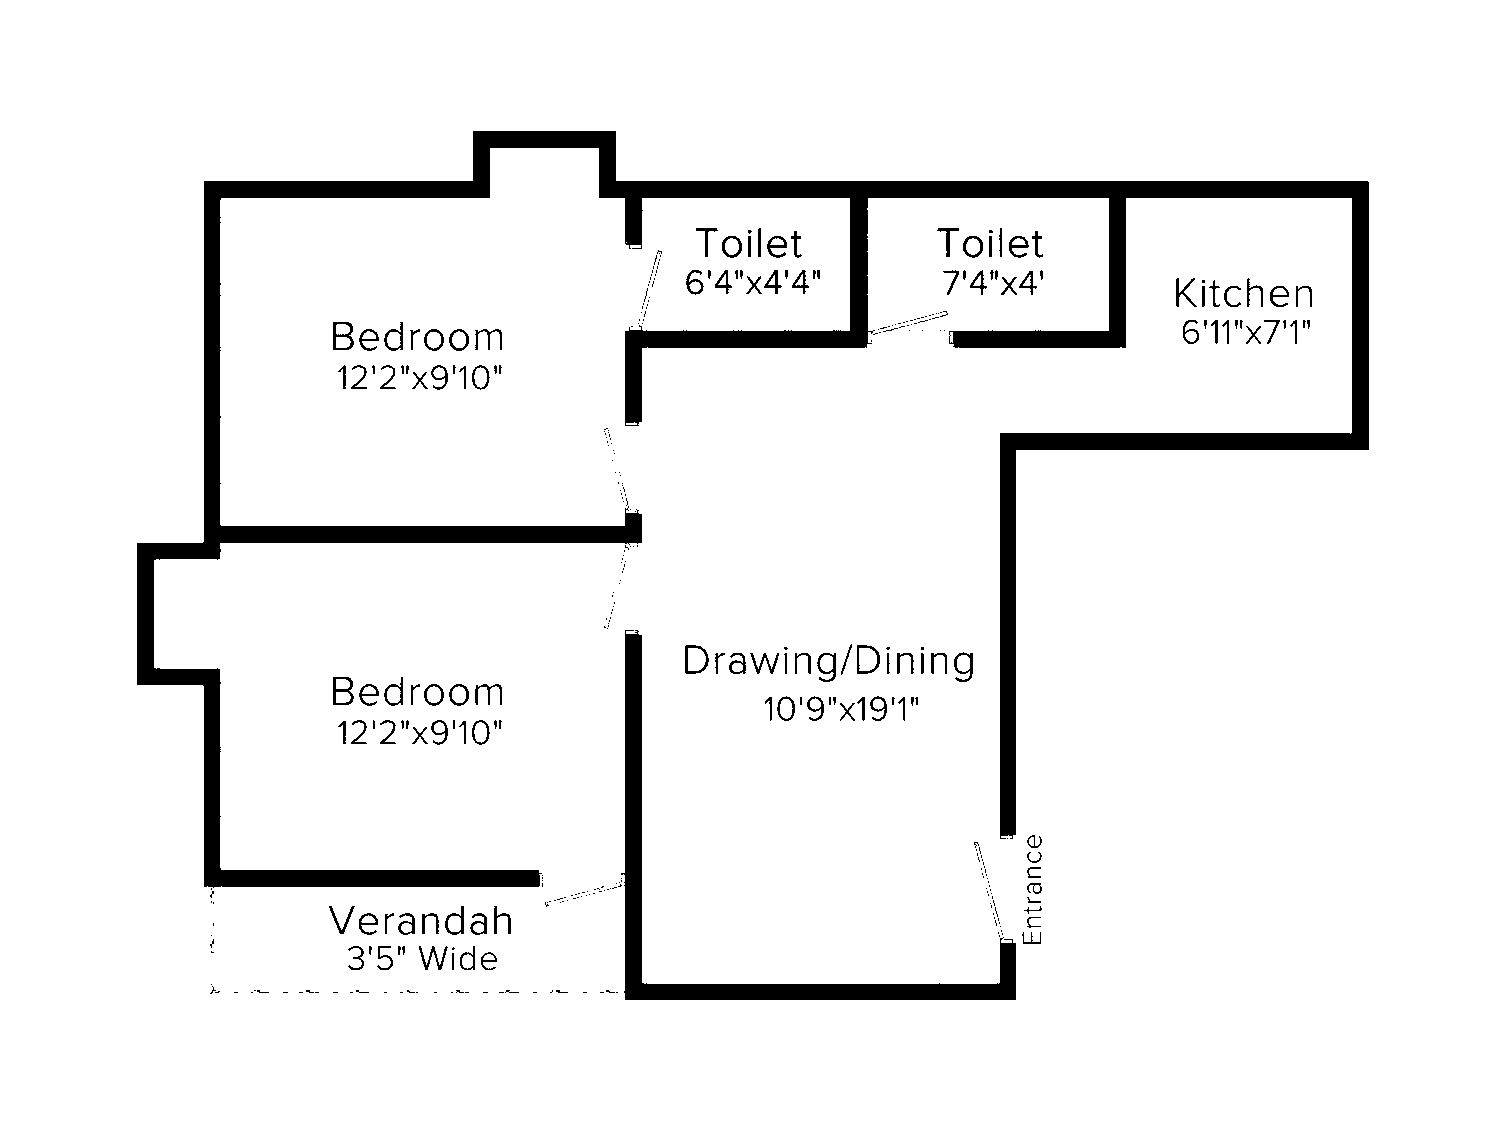

In [97]:

display(Image.fromarray(v>110))



686 820 toilet
938 1043 toilet
1176 1312 kitchen
333 502 bedroom
333 502 bedroom
685 973 drawing/dining
329 511 verandah
1023 1042 entrance


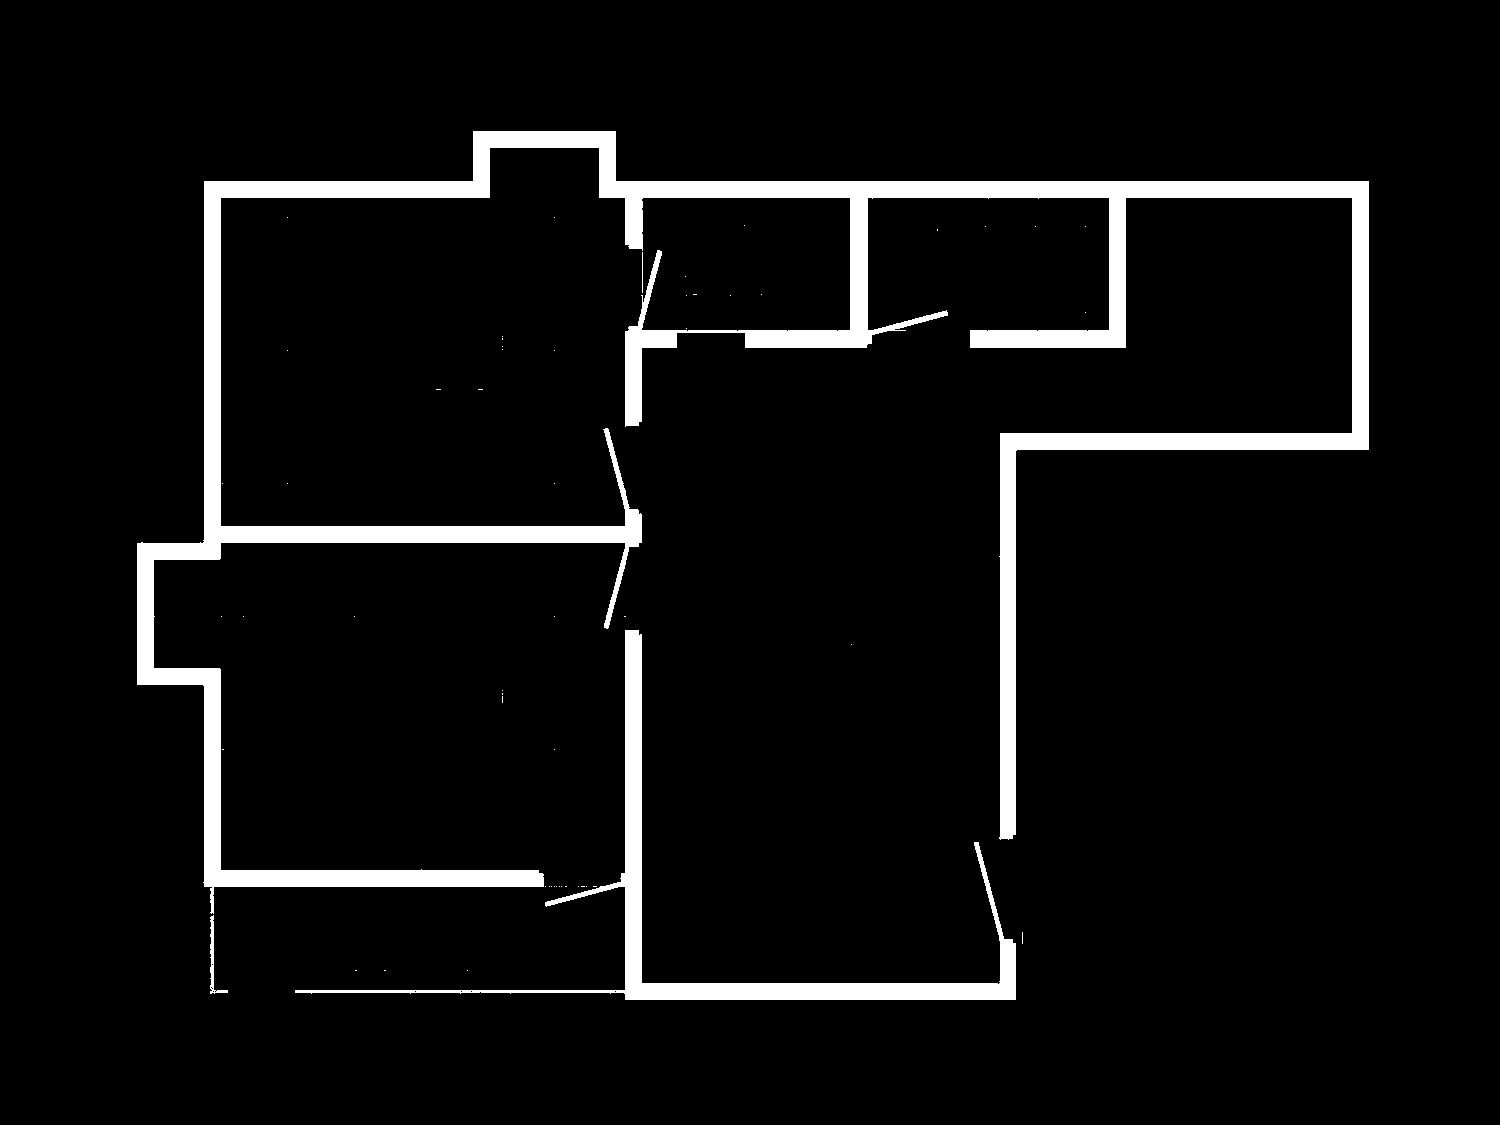

In [96]:
for i in labels:
    for j in labels[i]:
        poly = labels[i][j]
        x, y, w, h = poly
        xmin, xmax = x, x + w
        ymin, ymax = y, y + h
        print(xmin, xmax, i)
        for px in range(xmin, xmax):
            for py in range(ymin, ymax):

                mask[py, px] = 1

imshow(mask == 0)

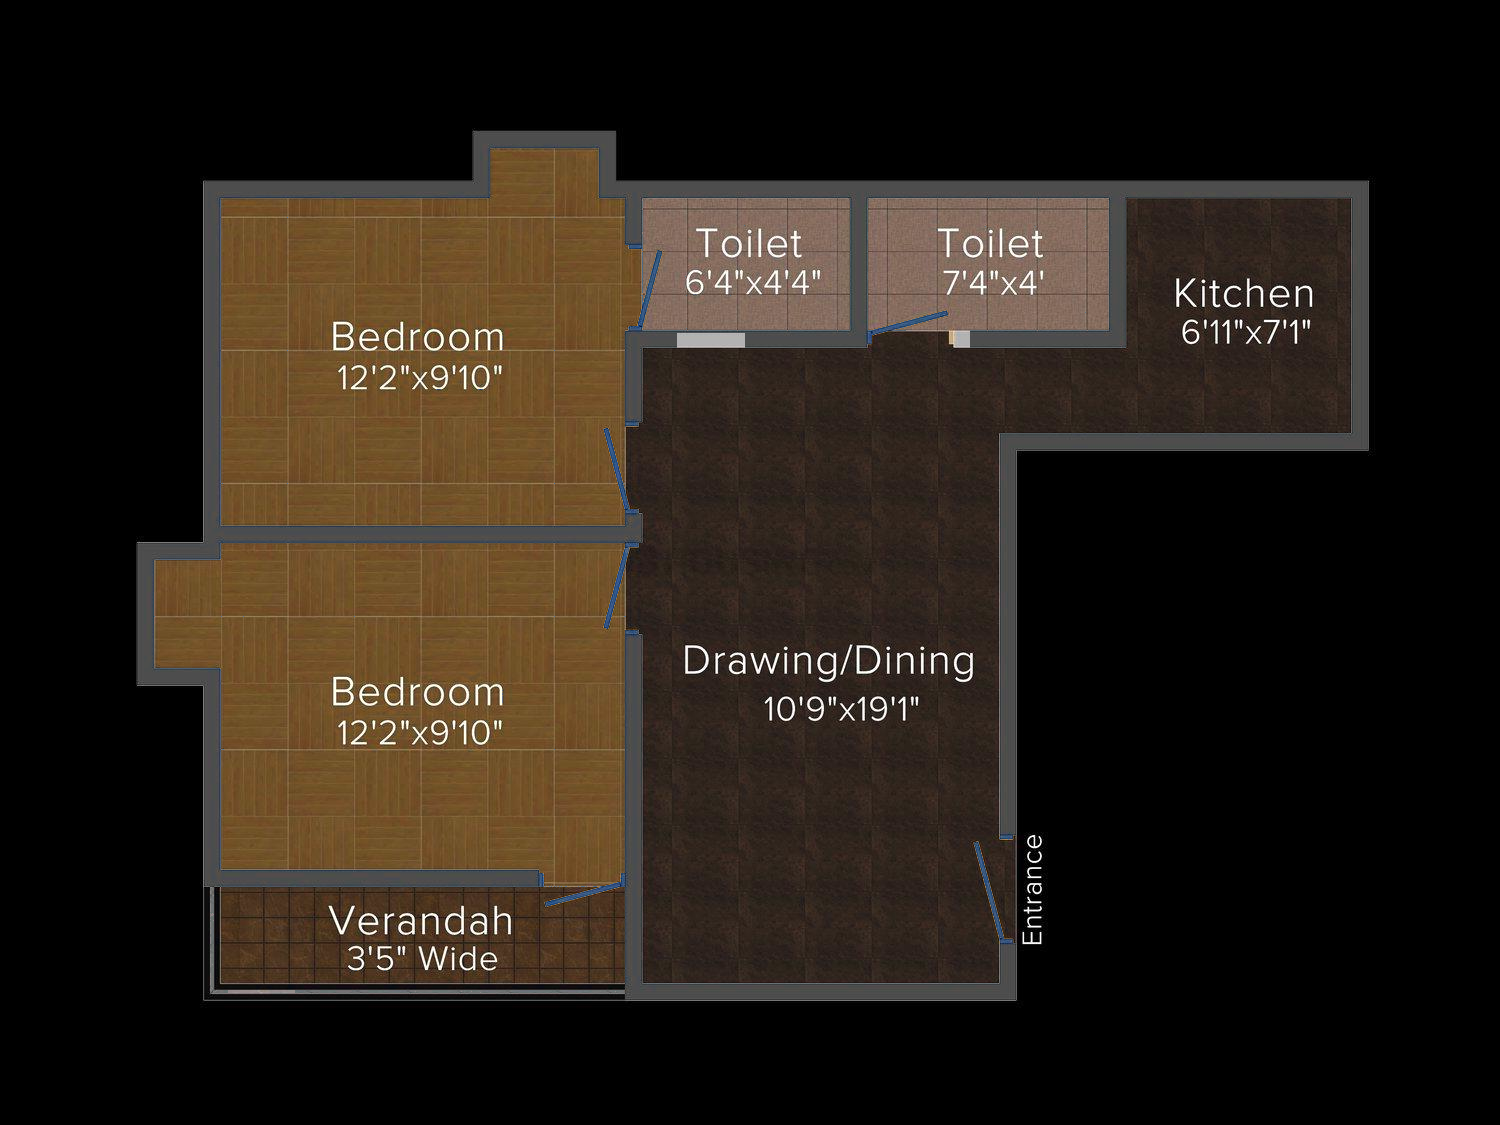

In [111]:
img = cv2.imread('0034158_0000000.jpeg')

new_mask = np.zeros_like(img)

for a in range(lenimg:
    for b

out = cv2.bitwise_xor(img, new_mask)
imshow(out)